# Exercise Sheet 3

### Exercise 1 (ii)

In [191]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/dominik/cse/2022W/finance/ex3/HistoricalPrices_NASDAQ.csv', sep=',;')
rmnd = pd.read_csv('/home/dominik/cse/2022W/finance/ex3/HistoricalPrices_NASDAQ_15NOV.csv')
print("mean: {}, variance {}".format(np.mean(rmnd['Close']), np.var(rmnd['Close'])))
rmnd = rmnd[1:]

data = data.loc[::-1] # reverse order
data = data.reset_index(drop = True)

data.tail()

mean: 10934.03084671739, variance 168291.0180720165


/tmp/ipykernel_6369/3381595867.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/home/dominik/cse/2022W/finance/ex3/HistoricalPrices_NASDAQ.csv', sep=',;')


,Date,Open,High,Low,Close
170,09/06/22,11643.03,11679.43,11471.50,11544.91
171,09/07/22,11559.38,11819.07,11555.08,11791.90
172,09/08/22,11679.85,11896.73,11660.53,11862.13
173,09/09/22,11958.61,12132.67,11958.61,12112.31
174,09/12/22,12174.94,12270.19,12169.28,12266.41


In [184]:
rmnd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2022-09-13,11908.809570,11957.969727,11604.429688,11633.570313,11633.570313,5188380000
2,2022-09-14,11680.410156,11746.830078,11602.759766,11719.679688,11719.679688,4861530000
3,2022-09-15,11633.240234,11760.730469,11497.110352,11552.360352,11552.360352,4805910000
4,2022-09-16,11401.209961,11460.429688,11316.919922,11448.400391,11448.400391,7451840000
5,2022-09-19,11338.570313,11538.129883,11337.830078,11535.019531,11535.019531,4168670000


In [185]:
S = data['Close'] # closing prices
S0 = S.iloc[0]

n = len(S) + 1
T = len(S)

In [186]:
m  = len(S)
dt = T/n # warum nicht 1 ?

mu = ( np.log(S.iloc[-1]/S0) - np.log(1) ) / (dt*m) 
print("estimated mu:", mu)

estimated mu: -0.0014667285720387439


In [187]:
Xm = np.log(S/S0)
dX = Xm.diff()[1:].reset_index(drop=True) # increments

sigma = 1/m * sum( ( (dX - mu*dt)**2 ) / dt )
print("estimated sigma square:", sigma)

estimated sigma square: 0.0004111849047965208


### Exercise 2

In [206]:
# create a Wiener process
def Wt(T, n):
    dt = T/n
    X = np.zeros(n)
    for i in range(0, n):
        X[i] = X[i-1] + np.random.normal(0, dt)
    return X

mean: 11909.552400497249, variance 463156.9365110996


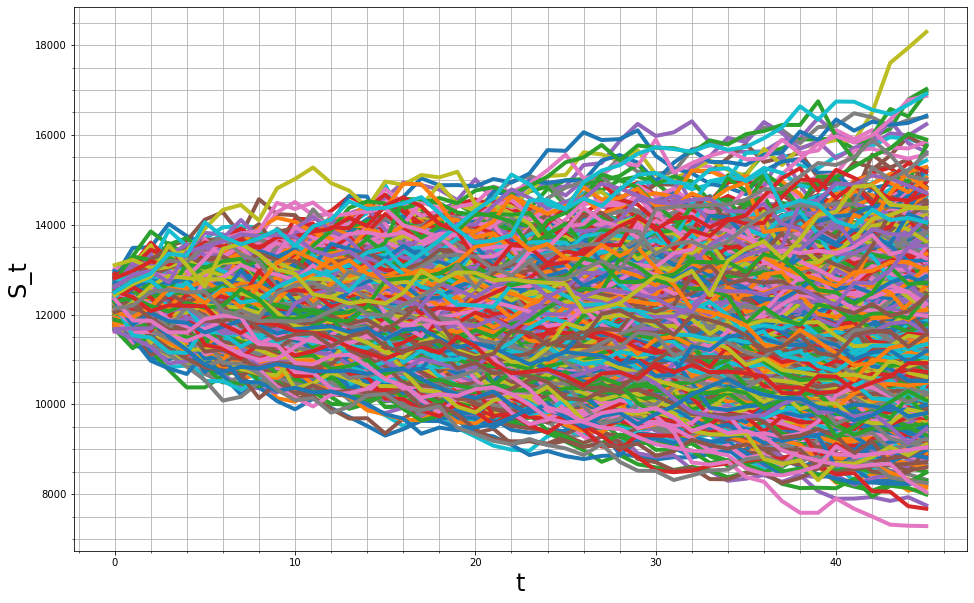

In [207]:
n_rmnd = len(rmnd) + 1
T_rmnd = len(rmnd)
 
t_rmnd = np.linspace(0, T_rmnd, n_rmnd)

def St(T, n):
    return S.iloc[-1] * np.exp( mu * t_rmnd + np.sqrt(sigma) * Wt(T, n) )

means = []
vars = []

plt.figure(figsize=(16, 10))
plt.xlabel("t", fontsize=24)
plt.ylabel("S_t", fontsize=24)
plt.minorticks_on()
plt.grid(which="both")
for i in range(1000):
    simulation = St(T_rmnd, n_rmnd)
    means.append(np.mean(simulation))
    vars.append(np.var(simulation))
    plt.plot(t_rmnd, simulation, lw=4)

print("mean: {}, variance {}".format(np.mean(means), np.mean(vars)))

In [209]:
print(np.min(means))
print(np.max(means))

9568.83888516446
14790.97575988145


mean: 10904.422417622221, variance 131704.50109336872


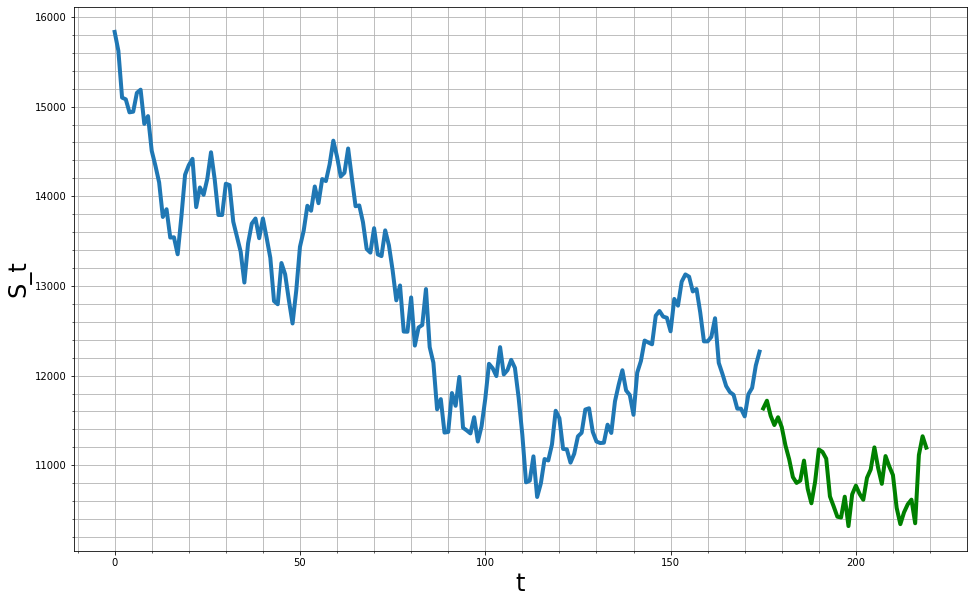

In [208]:
plt.figure(figsize=(16, 10))
plt.xlabel("t", fontsize=24)
plt.ylabel("S_t", fontsize=24)
plt.minorticks_on()
plt.grid(which="both")
print("mean: {}, variance {}".format(np.mean(rmnd['Close']), np.var(rmnd['Close'])))
plt.plot(range(0, 175), S, lw=4)
plt.plot(range(175, 220),rmnd["Close"], c="green", lw=4)
plt.show()